<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/dsp-practical-guide/ch05/discrete_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import math

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

In [50]:
def convolve(x, h):
  size = len(x) + len(h) - 1
  y = [0] * size


  for x_index in range(len(x)):
    for h_index in range(len(h)):
      index = x_index + h_index
      y[index] = y[index] + x[x_index] * h[h_index]

  return y

def plot_convolution(x, h, y):
  fig, (x_plot, h_plot, xh_plot) = plt.subplots(1,3, figsize=(15, 5), sharey='row')
  x_plot.plot(x, 'o')
  x_plot.grid(axis='both')
  x_plot.set_title('x')
  
  h_plot.plot(h, 'o')
  h_plot.grid(axis='both')
  h_plot.set_title('h')
  
  xh_plot.plot(y, 'o')
  xh_plot.grid(axis='both')
  xh_plot.set_title('x*h')


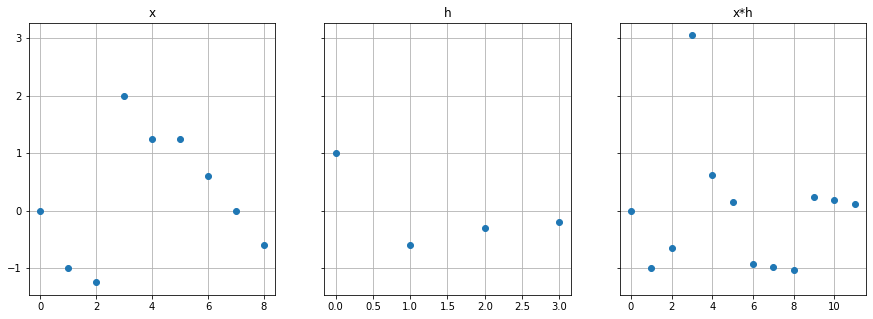

In [51]:
x = [0, -1, -1.25, 2, 1.25, 1.25, 0.6, 0, -.6]
h = [1, -0.6, -0.3, -0.2]
y = convolve(x, h)
plot_convolution(x, h, y)


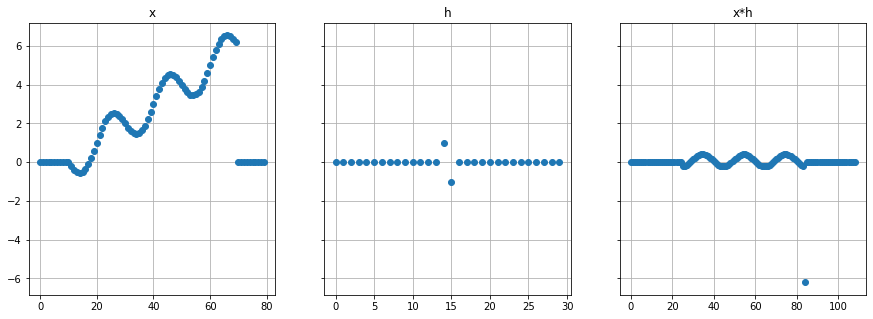

In [57]:
x = [0] * 80
for index in range(10, 70):
  x[index] = math.sin(index*math.pi/10) + index/10 - 1

h = [0] *30
h[14] = 1
h[15] = -1

y = convolve(x, h)
plot_convolution(x, h, y)